In [143]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read in the data
df = pd.read_csv('/Users/akulahluwalia/Downloads/movies.csv')

In [144]:
#Looking at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [145]:
#Evaluating for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [146]:
#Dropping missing values

df.dropna(inplace=True)

In [147]:
#Examining data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [148]:
#Changing Data Types

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [149]:
df.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [150]:
#Creating Correct Year Column

df['year_correct']=df['released'].astype('str').str[8:13]

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime year_correct  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0        1980   
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0        1980   
4   39846344      Orion Pictures     98.0         1980

In [155]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   

      star  country     budget       gross  company  runtime  year_correct  
5445  1534       47  237000000  2847246203     1382    162.0            11  
7445  1470       47  356000000  2797501328      983    181.0            83  
3045  1073       47  200000000  2201647264     1382    194.0            12  
6663   356       47  245000000  2069521700      945    138.0            11  
7244  1470       47  321000000  2048359754      983    149.0            83

In [156]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129    1474
5664    1473
4007    1472
6793    1471
6420    1470
3776    1469
3330    1468
520     1467
2213    1466
3698    1465
1180    1464
5180    1463
1321    1462
1329    1461
789     1460
5125    1459
5499    1458
4618    1457
4990    1456
5410    1455
5583    1454
6919    1453
4392    1452
4999    1451
425     1450
6674    1449
4272    1448
450     1447
3943    1446
2466    1445
2355    1444
6720    1443
5276    1442
4863    1441
5550    1440
4572    1439
6616    1438
1306    1437
1475    1436
7017    1435
1304    1434
5496    1433
6672    1432
4781    1431
7267    1430
2843    1429
6578    1428
2341    1427
5845    1426
7401    1425
222     1424
7480    1423
7494    1422
5075    1421
4975    1420
7420    1419
5272    1418
5409    1417
1115    1416
6647    1415
1307    1414
6896    1413
3471    1412
1894    1411
1716    1410
4964    1409
1522    1408
5302    1407
6540    1406
7018    1405
7263    1404
2504    1403
4827    1402
251     1401
6208    1400
7594    1399
5635    1398

In [73]:
#Observations
# Budget and Gross revenue could have high correlation
#Company and Gross revenue coulad also have high correlation


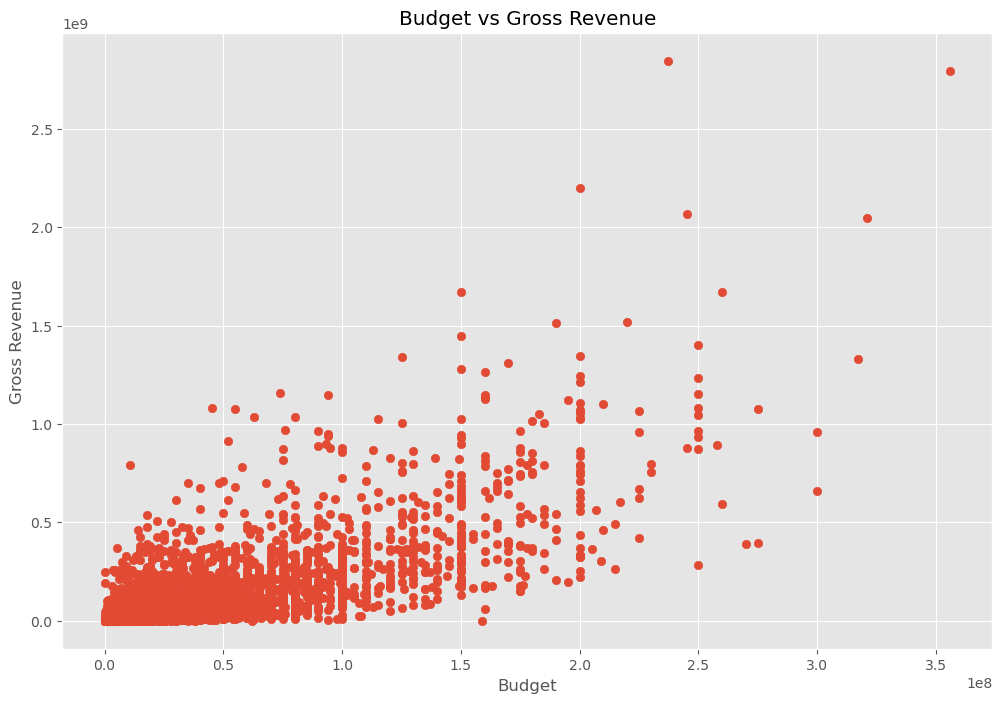

In [89]:
#Scatter plot for Budget vs Gross Revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

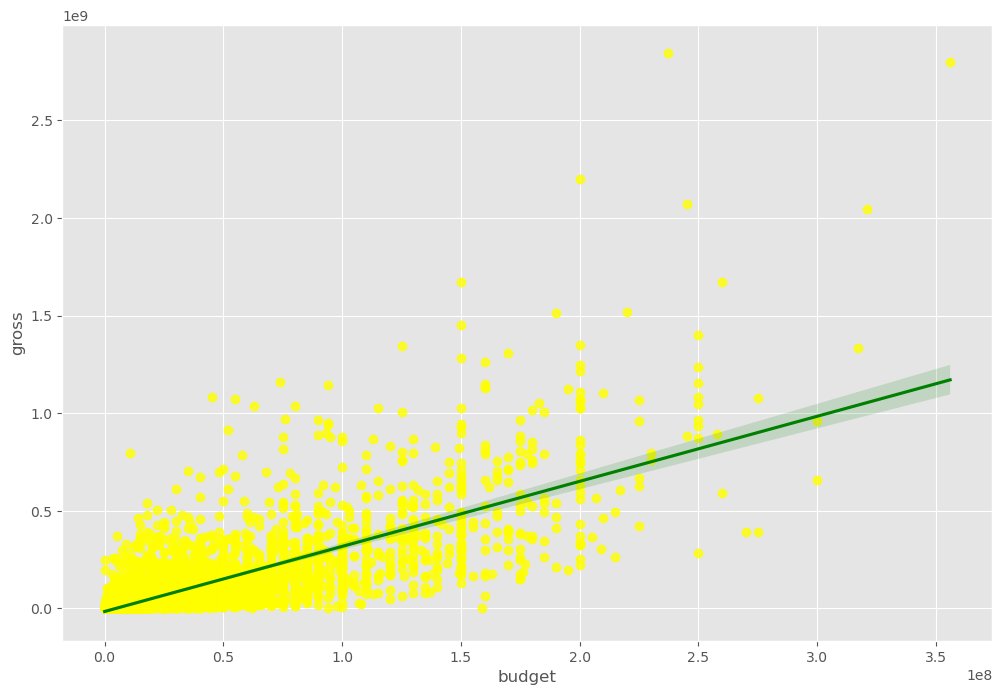

In [94]:
#Regression plot using Seaborn for Budget vs Gross Revenue

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'yellow'}, line_kws={'color':'green'})

In [106]:
#Pearson Correlation(Numeric Variables only)

numeric_df = df.select_dtypes(include = 'number')
correlation_matrix = numeric_df.corr(method= 'pearson')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000


In [107]:
#Note:
#High Correlation between Budget and Gross

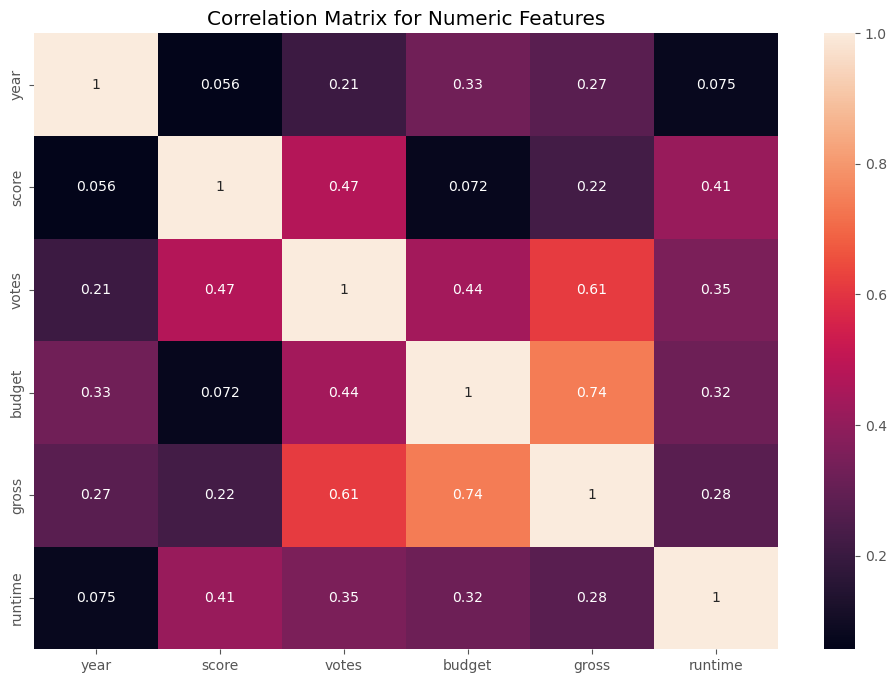

In [122]:
correlation_matrix = numeric_df.corr(method= 'pearson')

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [153]:
#Converting variables to numeric outputs

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
    

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   

      star  country     budget       gross  company  runtime  year_correct  
5445  1534       47  237000000  2847246203     1382    162.0            11  
7445  1470       47  356000000  2797501328      983    181.0            83  
3045  1073       47  200000000  2201647264     1382    194.0            12  
6663   356       47  245000000  2069521700      945    138.0            11  
7244  1470       47  321000000  2048359754      983    149.0            83

In [157]:
df

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

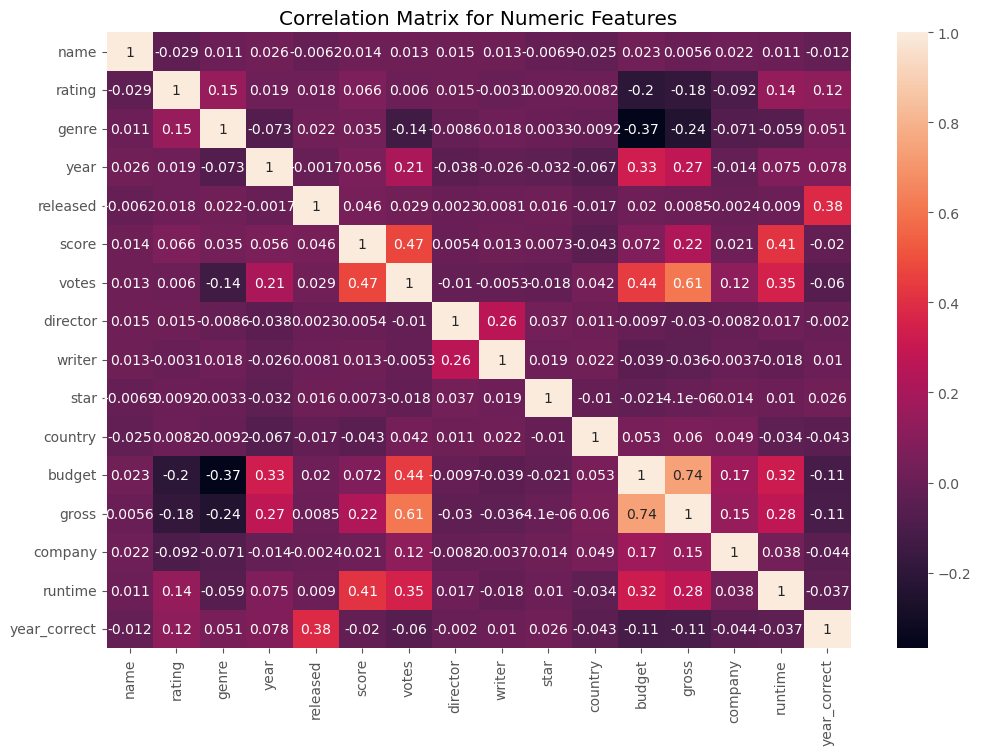

In [158]:
correlation_matrix = df_numerized.corr(method= 'pearson')

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [159]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name          1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating       -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre         0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year          0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released     -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score         0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes         0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director      0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer        0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star         -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country      -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget        0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross         0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company       0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime       0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
year_correct -0.012024  0.120958  0.051315  0.077609  0.380835 -0.020251   

                 votes  director    writer      star   country    budget  \
name          0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating        0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre        -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year          0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released      0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score         0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes         1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director     -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer       -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star         -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country       0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget        0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross         0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company       0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime       0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
year_correct -0.060276 -0.002020  0.010132  0.025947 -0.042842 -0.110161   

                 gross   company   runtime  year_correct  
name          0.005639  0.021697  0.010850     -0.012024  
rating       -0.181906 -0.092357  0.140792      0.120958  
genre        -0.244101 -0.071334 -0.059237      0.051315  
year          0.274321 -0.014333  0.075077      0.077609  
released      0.008501 -0.002407  0.008975      0.380835  
score         0.222556  0.020656  0.414068     -0.020251  
votes         0.614751  0.118470  0.352303     -0.060276  
director     -0.029560 -0.008223  0.017433     -0.002020  
writer       -0.035885 -0.003697 -0.017561      0.010132  
star         -0.000004  0.014082  0.010108      0.025947  
country       0.060078  0.048569 -0.034477     -0.042842  
budget        0.740247  0.170235  0.318695     -0.110161  
gross         1.000000  0.149553  0.275796     -0.106301  
company       0.149553  1.000000  0.037585     -0.044111  
runtime       0.275796  0.037585  1.000000     -0.036898  
year_correct -0.106301 -0.044111 -0.036898      1.000000

In [162]:
#Correlation matrix unstacked

corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct   -0.012024
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [165]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.368523
genre         budget         -0.368523
              gross          -0.244101
gross         genre          -0.244101
budget        rating         -0.203946
rating        budget         -0.203946
gross         rating         -0.181906
rating        gross          -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
budget        year_correct   -0.110161
year_correct  budget         -0.110161
gross         year_correct   -0.106301
year_correct  gross          -0.106301
rating        company        -0.092357
company       rating         -0.092357
genre         year           -0.073167
year          genre          -0.073167
company       genre          -0.071334
genre         company        -0.071334
year          country        -0.066748
country       year           -0.066748
year_correct  votes          -0.060276
votes         year_correct   -0.060276
runtime       genre          -0.059237
genre         runtime    

In [173]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]

high_corr

gross   votes     0.614751
votes   gross     0.614751
gross   budget    0.740247
budget  gross     0.740247
dtype: float64